In [7]:
from mb_rag.basic import ModelFactory
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')
# llm = ModelFactory(model_name="gemini-2.5-pro", model_type='google')

In [2]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [8]:
from mb_rag.agents.seg_autolabel import create_bb_agent,SegmentationGraph

In [9]:
agent = create_bb_agent(llm.model,logging=False,langsmith_params=True)
graph_agent = SegmentationGraph(agent)

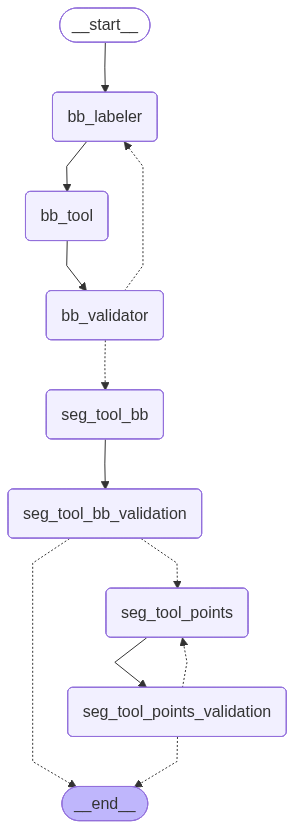

In [10]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "waste bin",\n      "box": [\n        0.390,\n        0.520,\n        0.670,\n        0.850\n      ],\n      "valid": false\n    },\n    {\n      "label": "waste bin",\n      "box": [\n        0.145,\n        0.635,\n        0.370,\n        0.960\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'Es0jCsojAXLI2nzNMMKuAkAZjRKyI24A8jOEvJYenBwk1GHHLO6ZQC1XCV5q7o8hG+RB4d3tBdcogPIkqxdZ04Tq2AwVCtWriL/fEGQRJ815boqxcPGBEQK3hQd8Ufcgf7gMwcA40nAHIl+gAC/6n+lVCu+JiBuK816LL43gw+DRwjO7Po+vLlrPdOYW7rcaFXc8PK0p4wdkRkFMwoyiSe3vqHsqyWpq6PmjBkQL954w+PV9bM5A/IUqSoIMW2/2iRU9vhH+5h32MIXujp0CFZMtAGx7nNWHhKb5fh8ZlK0B/lxGPCJc6m/A03CrongwpTYXnYIXYxr/QwfbNr4Y6/yb/lrqHZEWmYdAmaaCXcKF0EvDgH/SHOzd6LXWJuXLNrUgH7ZNuvX0YwBTwg9+lq5oo8clKiR/+W0a3fZW/rVVLPeMMmXpFRiLrLjZrg/dZSi+tkLxDdueJXE6gt5KJtPhyDzu2HLS+yqjhAJSWULwt0cJcpfZ8GPjLObooKAtUs8IUk9zfbROagjVJeF0r1Zp+oiCwoYOBYJM+ChHv4fIPVIbIi

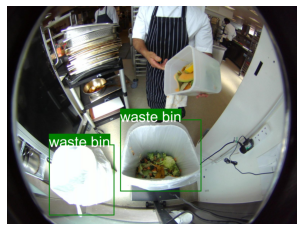

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "bb_valid": true,\n  "failed_labels": []\n}\n```', 'extras': {'signature': 'EsITCr8TAXLI2nxsD9R65xLOLhxw5Py5gEhgj5dc0f2Bt9PfktU3aON9oyLpWfW9+YH+vr+O2oUhKz0waNPCwRtKQAS5BMgMwEIfiUbapH72DbSHxgN8VPkh9ZoAKBO8UluzKxiD56Ew30gkcs9DUoHeEqMnbyY/jgASNvE0nCimVLDjJpTCA14hCmuQr62S8p6AMGXfhMX0ZG0Ii5ICw1F4OjzFfYvuVolDHlu1LK0HXdJ5l6fWmHZHzz5kD1dYs+Wm+3vQbuEjiQ4t2uNsPWlmYlnP3ojGME45DVQ8rUDqm/8wPiRaw3p+dUnRe8zzRMbwoIKxyv9qXq4Q+QXTTiE0jMm3KeEnTODPC5RoVufWN2TfQJsUXo4rYr8AGgDL5yEPsosZzvJ5zoOZ8IX+EkAbpbPO1vaPSRGlF4EibKmDG5MtZ081QIYunf3fi013LNb0j0c3wvlZBowHGcLVcHHLiBdrS2WPImVQa0GmyeAuIDvjMstLZf8MNexoDoqrT/kuu079E1e2JYxfnh7MXfnLtCsOFNqGIAnFtC2jxWK2vpYbX5ud0eDxhYLZKsiY8T9m5vdHnvNcvSJwXkSVHTzUeBlILSWsL+1M/qxkNThWf9wCgZu/ie022C7k3ncc82wlLTcO3CfefXiJ1k1bK0I9HYkMe6uF16DnupUVYZ40zGSOXPMZRXvUjBWRtngEsE6xq3S0D1VHIO0BmFr/5F2YtxpGzywayHZ4x9HAWwHrlGwymdmglIjR1TryjZvGC7EPSxrHHUcCqp+hFhj2EV/Mgqt6dKK5VHuXCd0rKMIyP97GvnDbRuMsNJ4Q7IKKWRcGsBXRAy1JDbf3zJU5YUHU

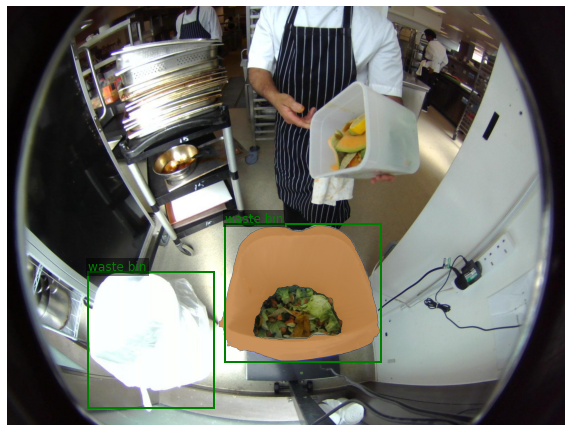

ValueError: axes don't match array

In [15]:
graph_agent.run(image_path='./data/test2_ml.jpg', query="Create a bounding box around waste bins in the image.")

In [ ]:
from mb_rag.utils.extra import ImagePredictor

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
a = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [ ]:
a.set_image('./data/image.jpg')

In [ ]:
a.image.shape

(768, 1024, 3)

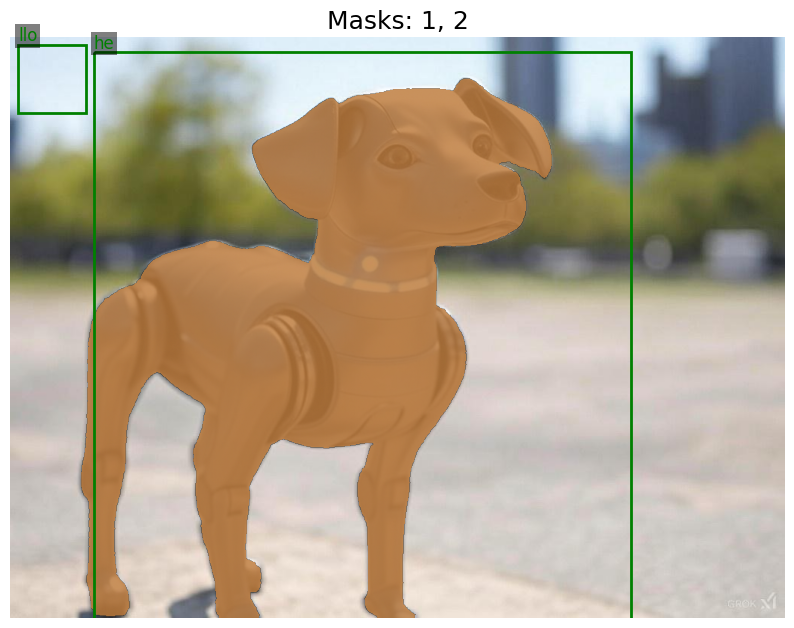

In [ ]:
mask,_,_ =a.predict_item(bbox=[[20, 110, 800, 820],[10,10,100,100]],labels_names=['he','llo']) 


(-0.5, 1023.5, 767.5, -0.5)

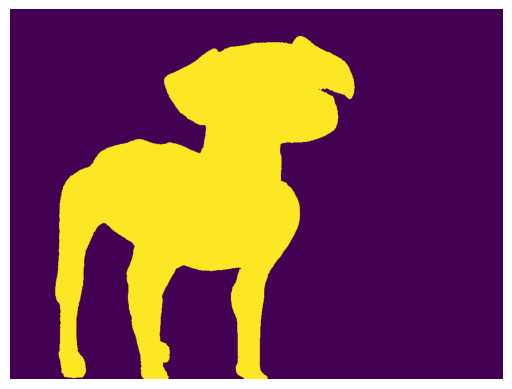

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mask_new = np.transpose(mask, (1, 2, 0))
plt.imshow(mask_new)
plt.axis('off')